<a href="https://www.kaggle.com/code/buckzie/brest-cancer-recurrence-prediction?scriptVersionId=141484392" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## 1) What is the brest cancer?

A breast is made up of three main parts: lobules, ducts, and connective tissue. The lobules are the glands that produce milk. The ducts are tubes that carry milk to the nipple. The connective tissue (which consists of fibrous and fatty tissue) surrounds and holds everything together.

Breast cancer is a disease in which cells in the breast grow out of control. There are different kinds of breast cancer. The kind of breast cancer depends on which cells in the breast turn into cancer.

Most breast cancers begin in the ducts or lobules. Breast cancer can spread outside the breast through blood vessels and lymph vessels. When breast cancer spreads to other parts of the body, it is said to have metastasized.

## 2) About dataset

##### This breast cancer domain was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia.

#### Features 

* age         : Range of patient's age
* menopause   : Menopause is a natural biological process that marks the end of a woman's menstrual cycles.
* tumer-size  : Indicates the dimensions of the tumor in the breast. It's usually given in millimeters (mm) and helps assess the tumor's growth and impact.
* inv-nodes   : INV Nodes are the number (range 0 - 39) of axillary lymph nodes that contain metastatic breast cancer visible on
* node-caps   : if the cancer does metastasise to a lymph node, although outside the original site of the tumor it may remain
* deg-malig   : One of the main causes of death is cancer. The most common cancer in women is breast cancer
* breast      : Position of breast
* breast-quad : The breasts are divided into 4 quadrants with the nipple as the center.
* irradiate   : Irradiation, also known as radiation therapy, is a common treatment for breast cancer.
* class       : This is the target attribute where classify the situation where there is recurrence or no recurrence of cancer after

## 3) Importing 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/breast-cancer-data/breast-cancer-data.csv


In [2]:
df = pd.read_csv("/kaggle/input/breast-cancer-data/breast-cancer-data.csv")

## 4) First look 

In [3]:
def info_dataset(dataframe):
    print("Top 5 of Dataset", dataframe.head(), 
          sep='\n', end = '\n\n')
    print(f"Total number of rows : {dataframe.shape[0]}", 
          sep='\n', end = '\n\n')
    print(f"Total number of columns: {dataframe.shape[1]}",
          sep='\n', end = '\n\n')
    print("Total number of missing values",dataframe.isnull().sum(), 
          sep='\n', end = '\n\n')
    print("Types of variables", dataframe.dtypes, 
          sep='\n', end = '\n\n')
    print("Descriptive statistics of numerical variables",dataframe.describe().T, 
          sep='\n', end = '\n\n')
    print("Descriptive statistics of categorical variables", dataframe.describe  (include=object).T, 
          sep='\n', end = '\n\n')
info_dataset(df)

Top 5 of Dataset
      age menopause tumer-size inv-nodes node-caps deg-malig  breast  \
0  40-49'  premeno'     15-19'      0-2'      yes'        3'  right'   
1  50-59'     ge40'     15-19'      0-2'       no'        1'  right'   
2  50-59'     ge40'     35-39'      0-2'       no'        2'   left'   
3  40-49'  premeno'     35-39'      0-2'      yes'        3'  right'   
4  40-49'  premeno'     30-34'      3-5'      yes'        2'   left'   

  breast-quad irradiate                  class  
0    left_up'       no'     recurrence-events'  
1    central'       no'  no-recurrence-events'  
2   left_low'       no'     recurrence-events'  
3   left_low'      yes'  no-recurrence-events'  
4   right_up'       no'     recurrence-events'  

Total number of rows : 286

Total number of columns: 10

Total number of missing values
age            0
menopause      0
tumer-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiate      0
class         

## 5) Data Process

In [4]:
missing = df.isna().sum().sum()
print(f"There are {missing} missing data points. We should remove these")

There are 9 missing data points. We should remove these


In [5]:
df = df.dropna()
df.shape

(277, 10)

In [6]:
df["class"].value_counts()

no-recurrence-events'    196
recurrence-events'        81
Name: class, dtype: int64

#### 🔴 This data is not balanced. We must take this into consideration 🔴

In [7]:
def syntax_fix(dataframe):
    for column in df.columns:
        df[column] = df[column].str.rstrip("'")
    df.columns = df.columns.str.replace('-', '_')
    df.rename(columns={'class': "target" }, inplace=True)
syntax_fix(df)

## 6) Visualization

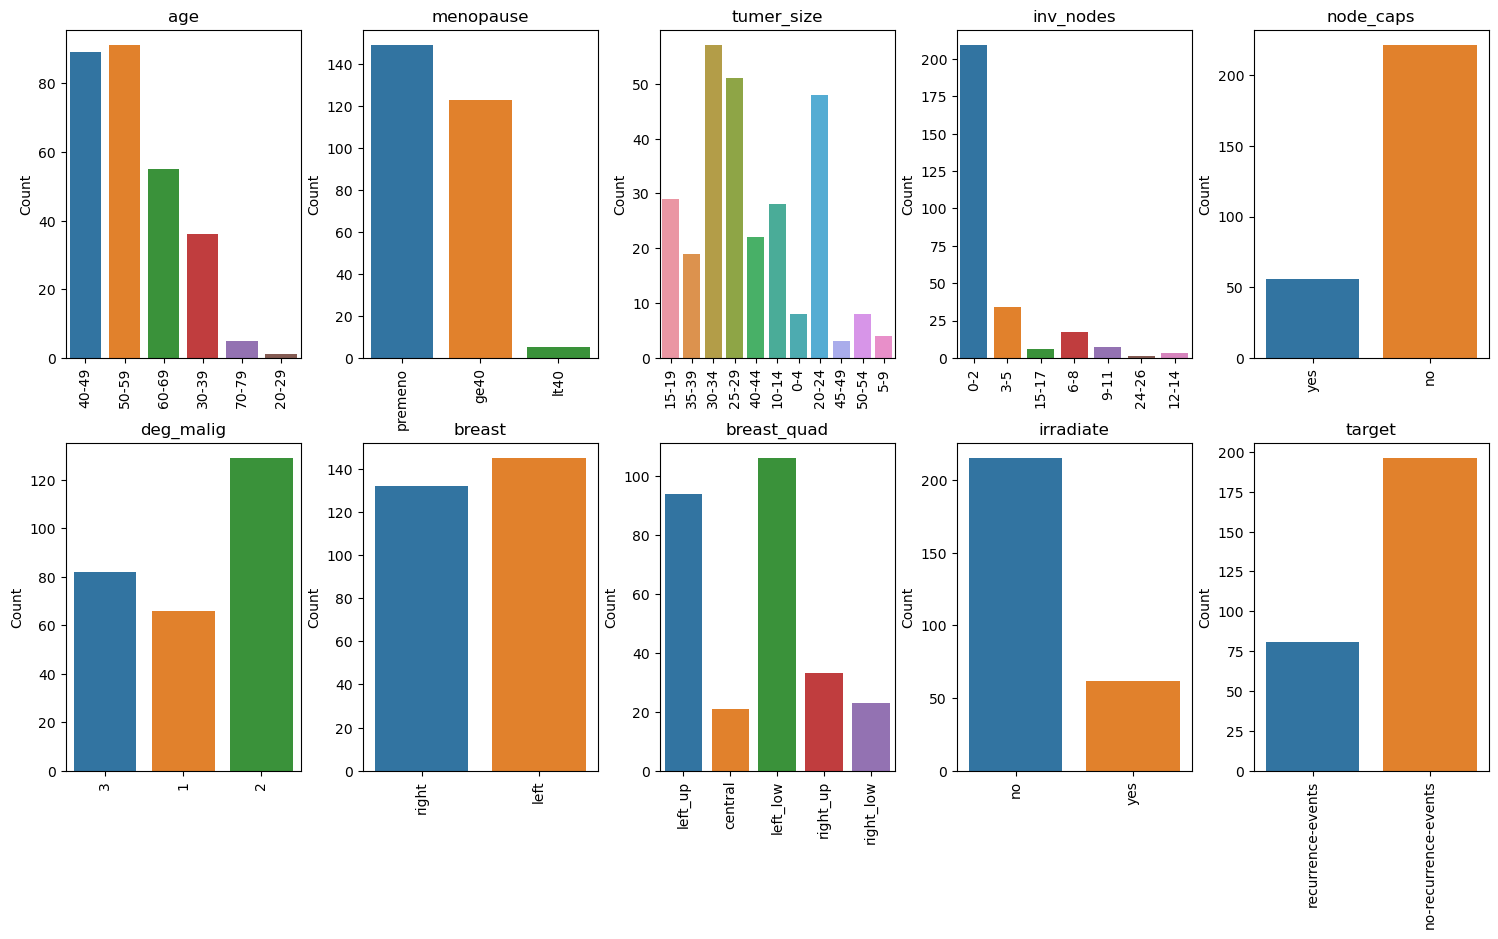

In [8]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
fig.tight_layout(h_pad=4)


for i, col in enumerate(df.columns):
    ax = axes[i // 5, i % 5] 
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=90)
    ax.set_xlabel("")
    ax.set_ylabel("Count")

In [9]:
filtered_df1 = df.query('irradiate == "no" and target == "no-recurrence-events"')
filtered_df2 = df.query('irradiate == "yes" and target == "no-recurrence-events"')
filtered_df3 = df.query('irradiate == "no" and target == "recurrence-events"')
filtered_df4 = df.query('irradiate == "yes" and target == "recurrence-events"')

* filtered_df1: People who didn't get Irradiation and didn't have a recurrence.
* filtered_df2: People who got Irradiation but didn't have a recurrence.
* filtered_df3: People who didn't get Irradiation and had a recurrence.
* filtered_df4: People who got Irradiation and had a recurrence.

### 6.1) Distribution of Irradiation (-) and Recurrence (-)

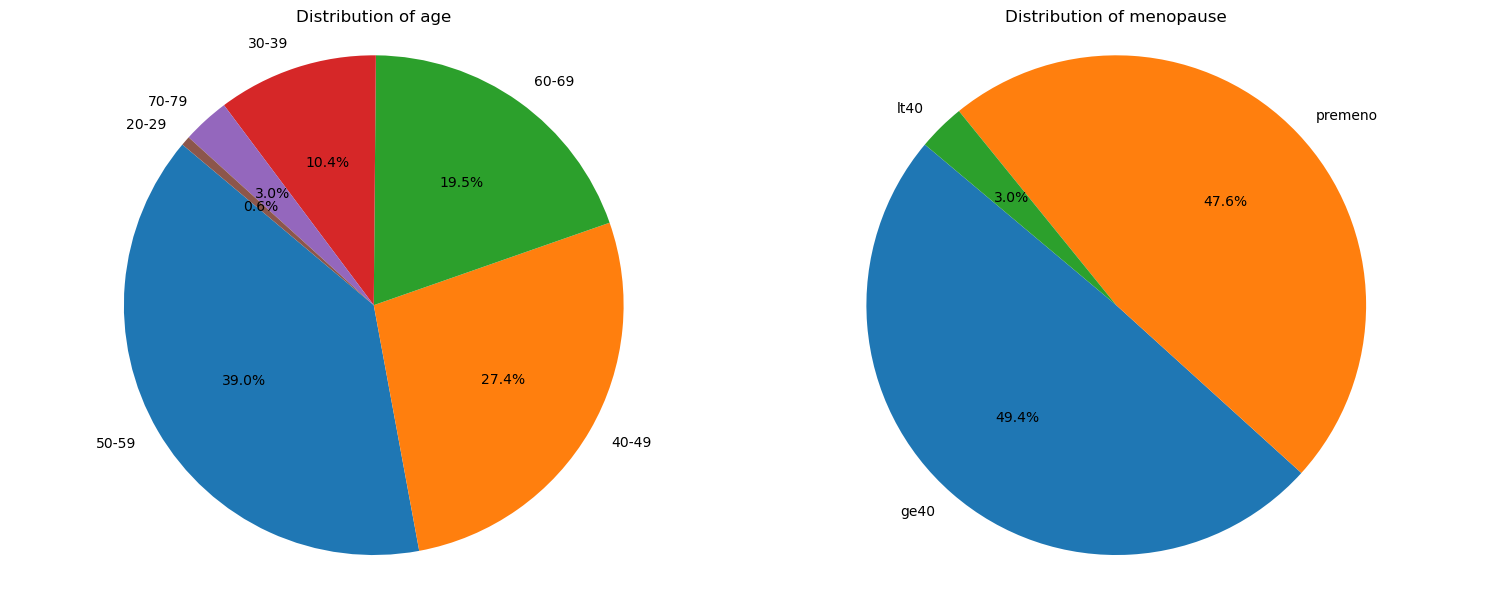

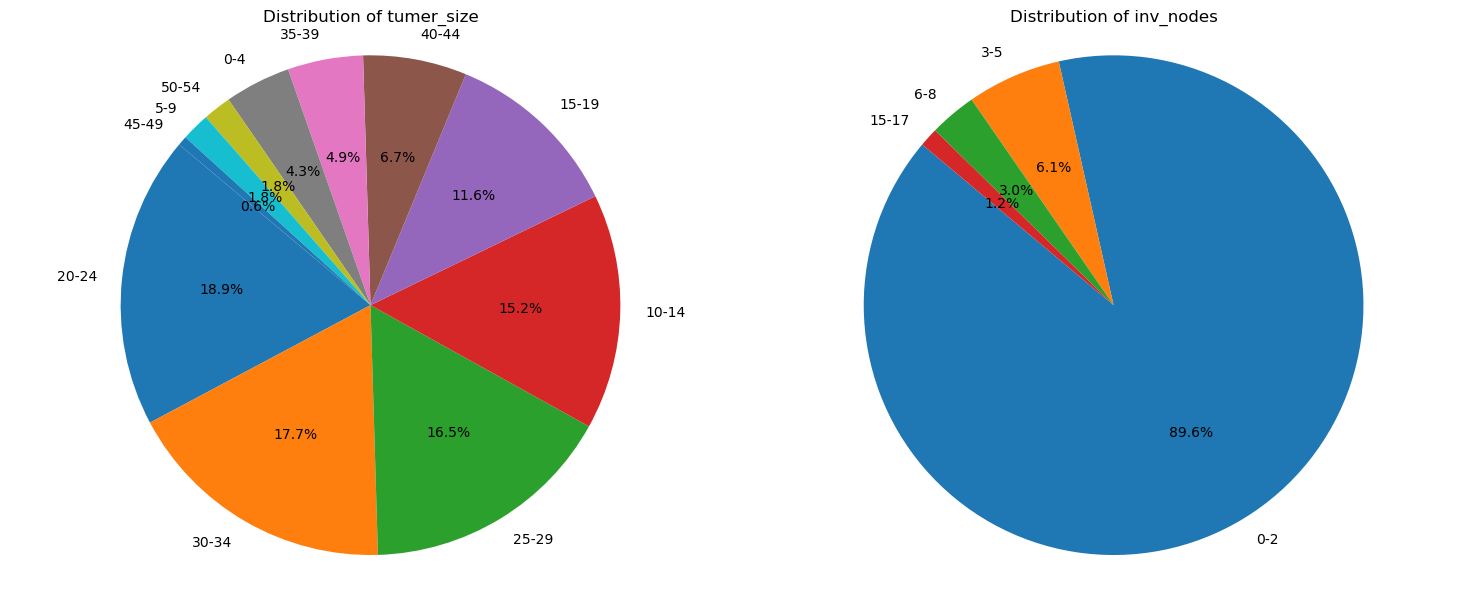

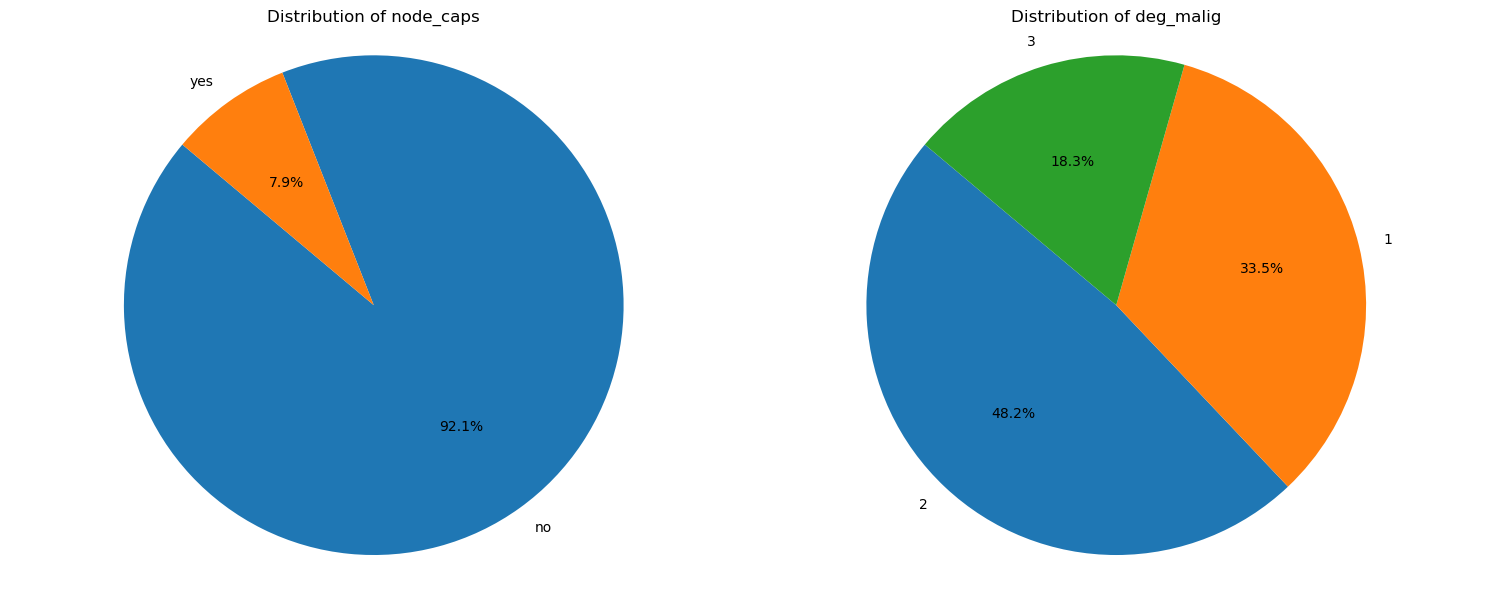

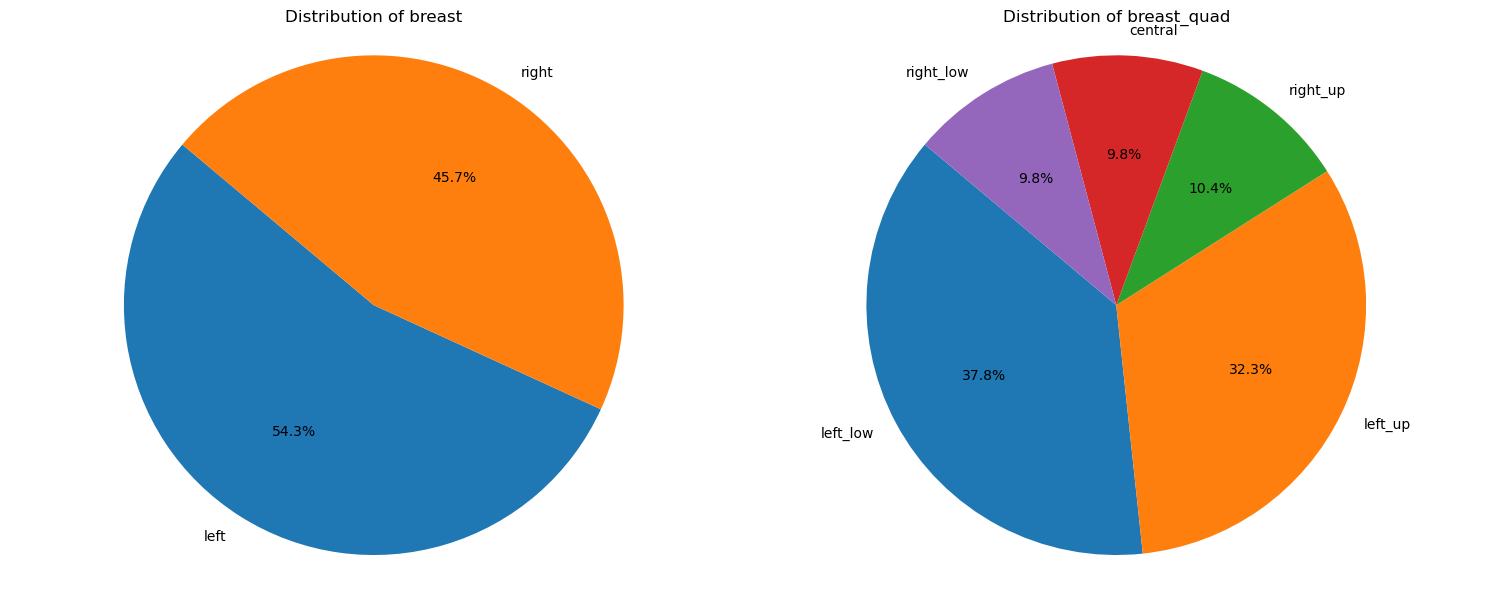

In [10]:
columns = ['age', 'menopause', 'tumer_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad']

column_groups = [columns[i:i+2] for i in range(0, len(columns), 2)]

for group in column_groups:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    for i, col in enumerate(group):
        ax = axes[i]
        value_counts = filtered_df1[col].value_counts()
        labels = value_counts.index
        sizes = value_counts.values
        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        ax.axis('equal')
        ax.set_title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()

### 6.2) Distribution of Irradiation (+) and Recurrence (-)

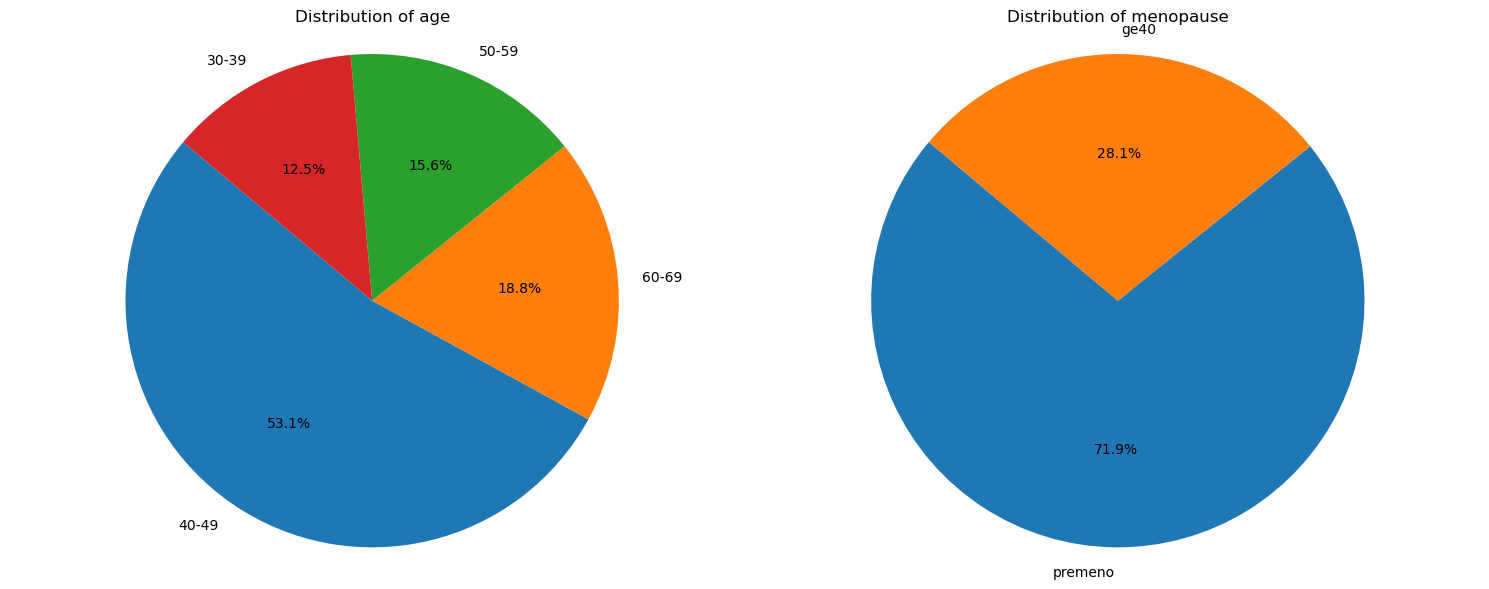

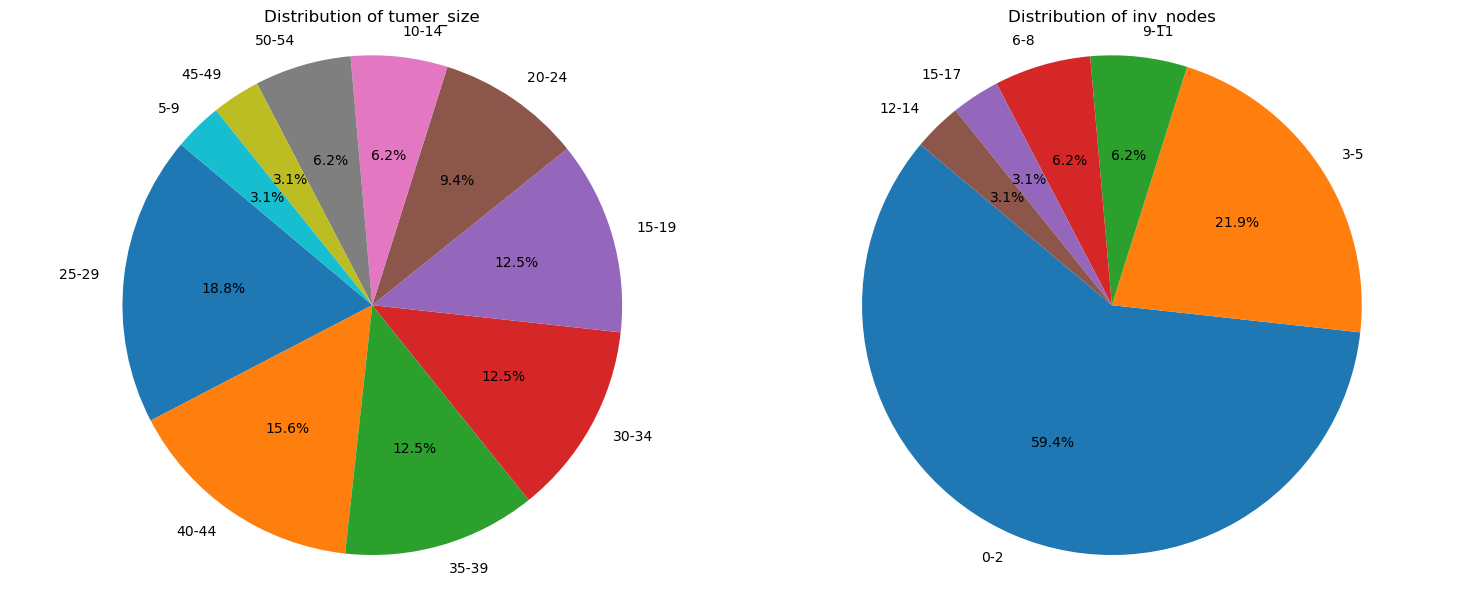

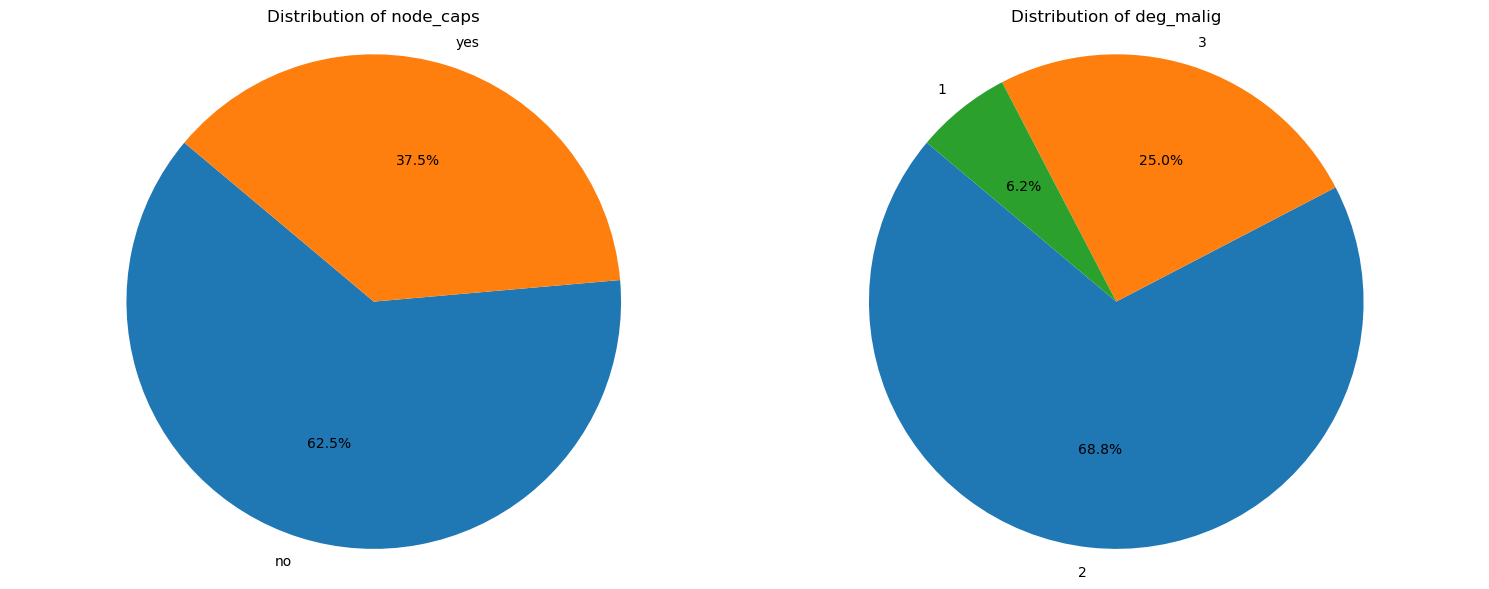

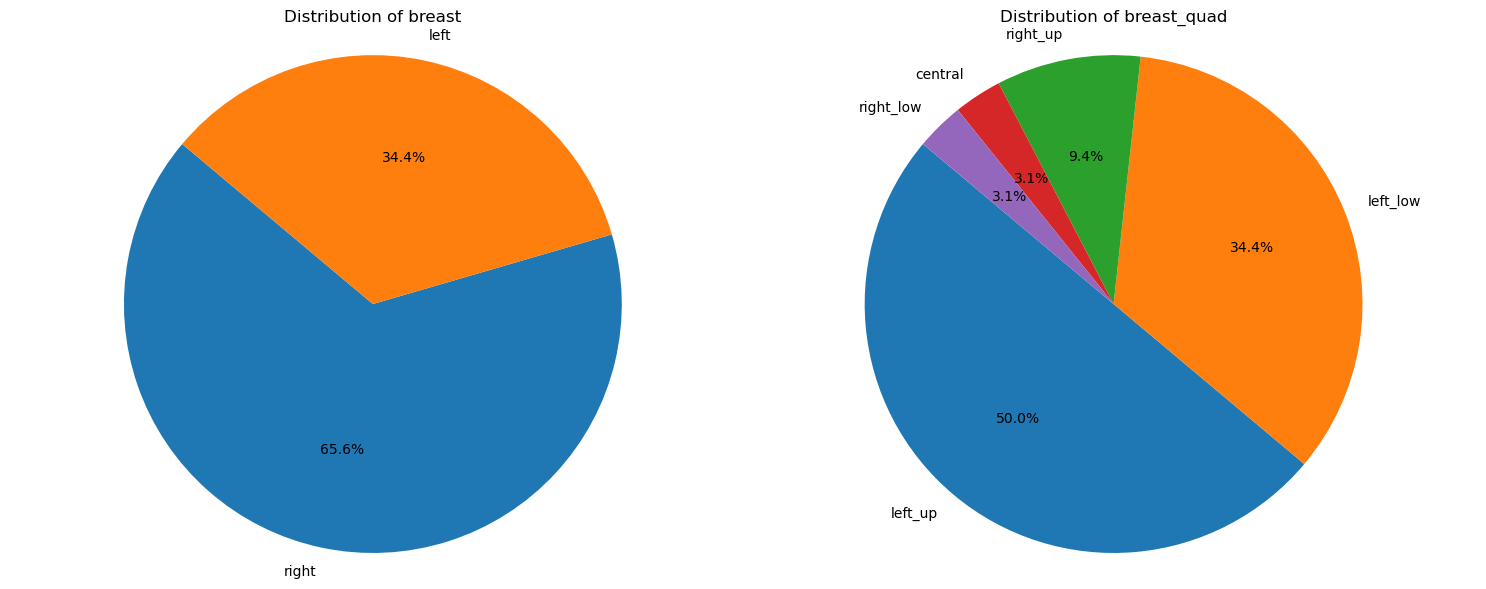

In [11]:
columns = ['age', 'menopause', 'tumer_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad']

column_groups = [columns[i:i+2] for i in range(0, len(columns), 2)]

for group in column_groups:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    for i, col in enumerate(group):
        ax = axes[i]
        value_counts = filtered_df2[col].value_counts()
        labels = value_counts.index
        sizes = value_counts.values
        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        ax.axis('equal')
        ax.set_title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()

### 6.3) Distribution of Irradiation (-) and Recurrence (+)

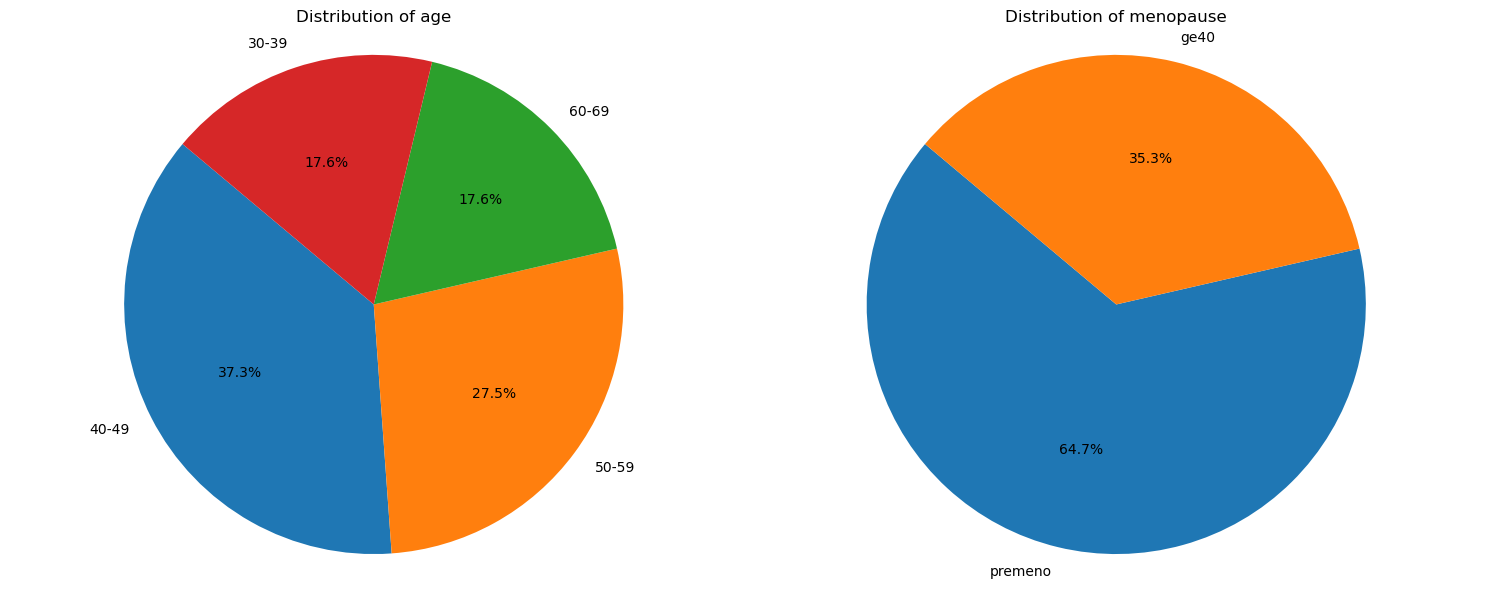

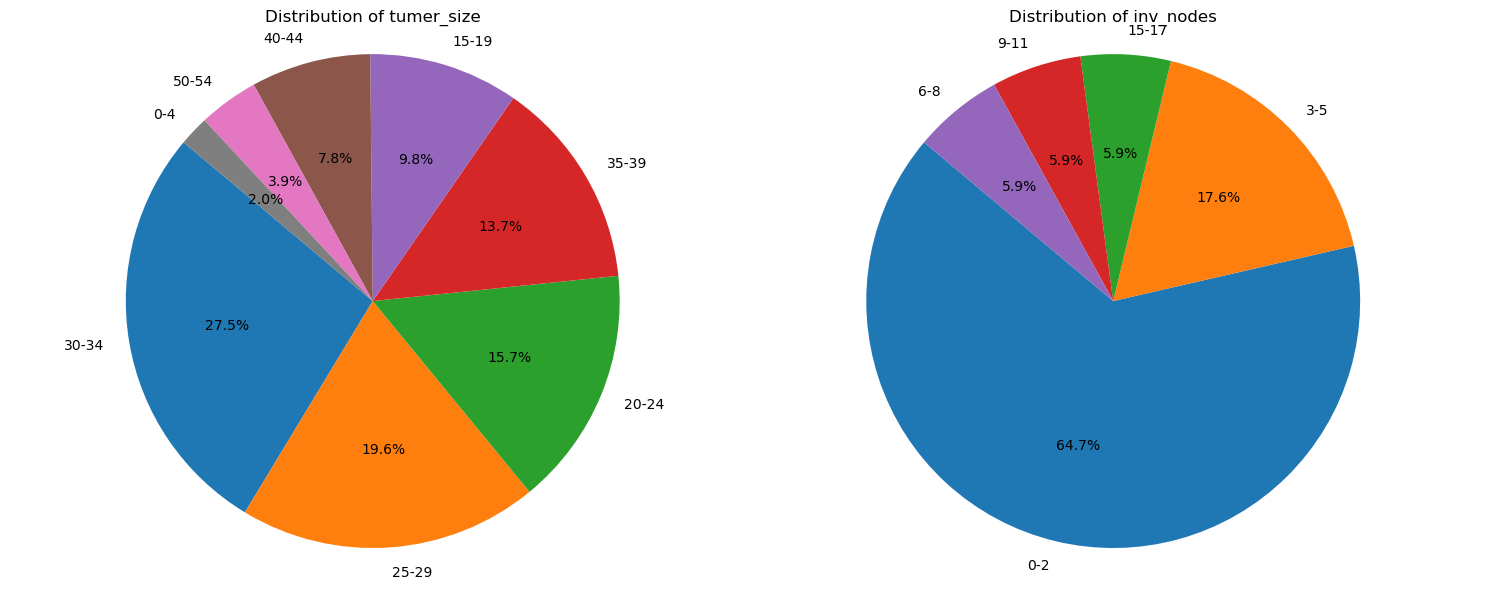

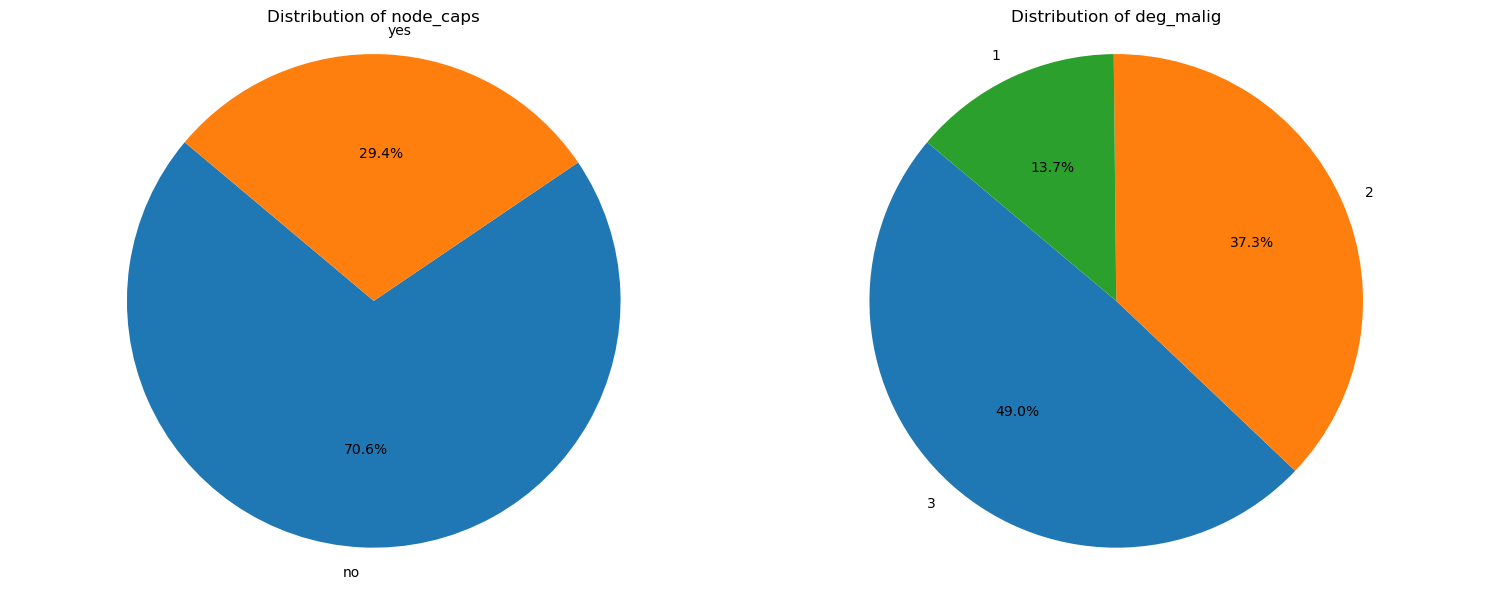

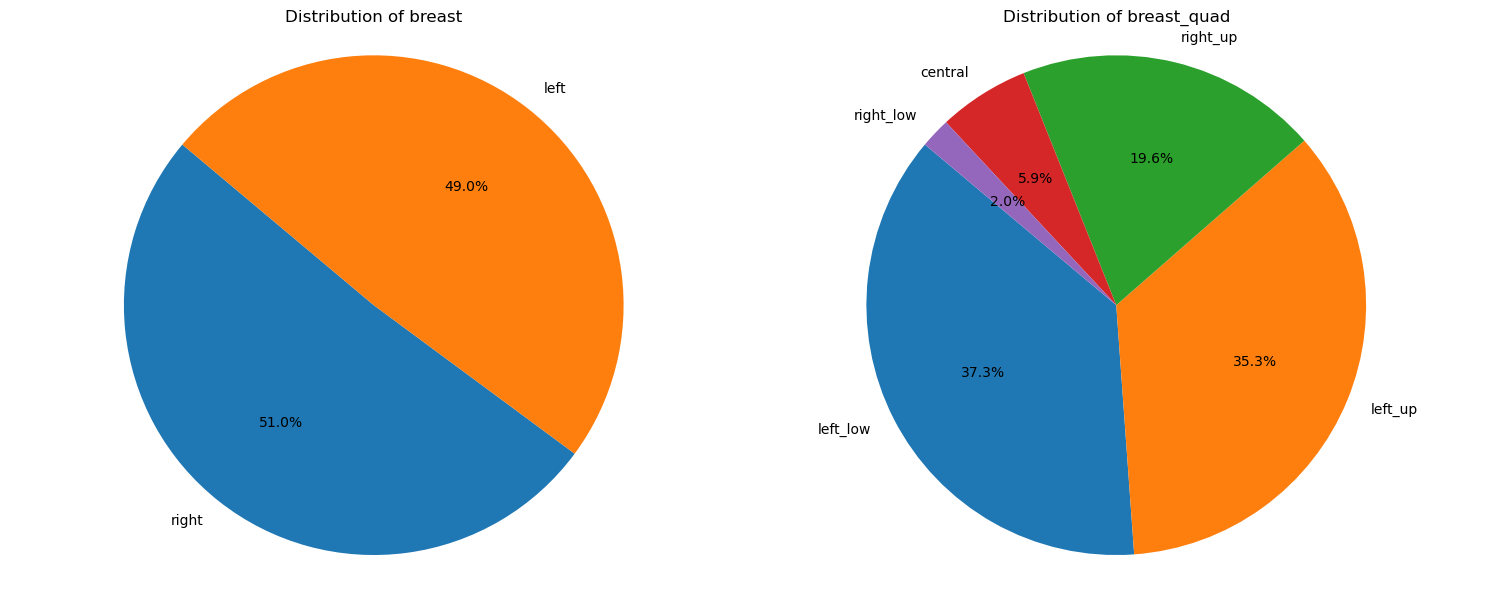

In [12]:
columns = ['age', 'menopause', 'tumer_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad']

column_groups = [columns[i:i+2] for i in range(0, len(columns), 2)]

for group in column_groups:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    for i, col in enumerate(group):
        ax = axes[i]
        value_counts = filtered_df3[col].value_counts()
        labels = value_counts.index
        sizes = value_counts.values
        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        ax.axis('equal')
        ax.set_title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()

### 6.4) Distribution of Irradiation (+) and Recurrence (+)

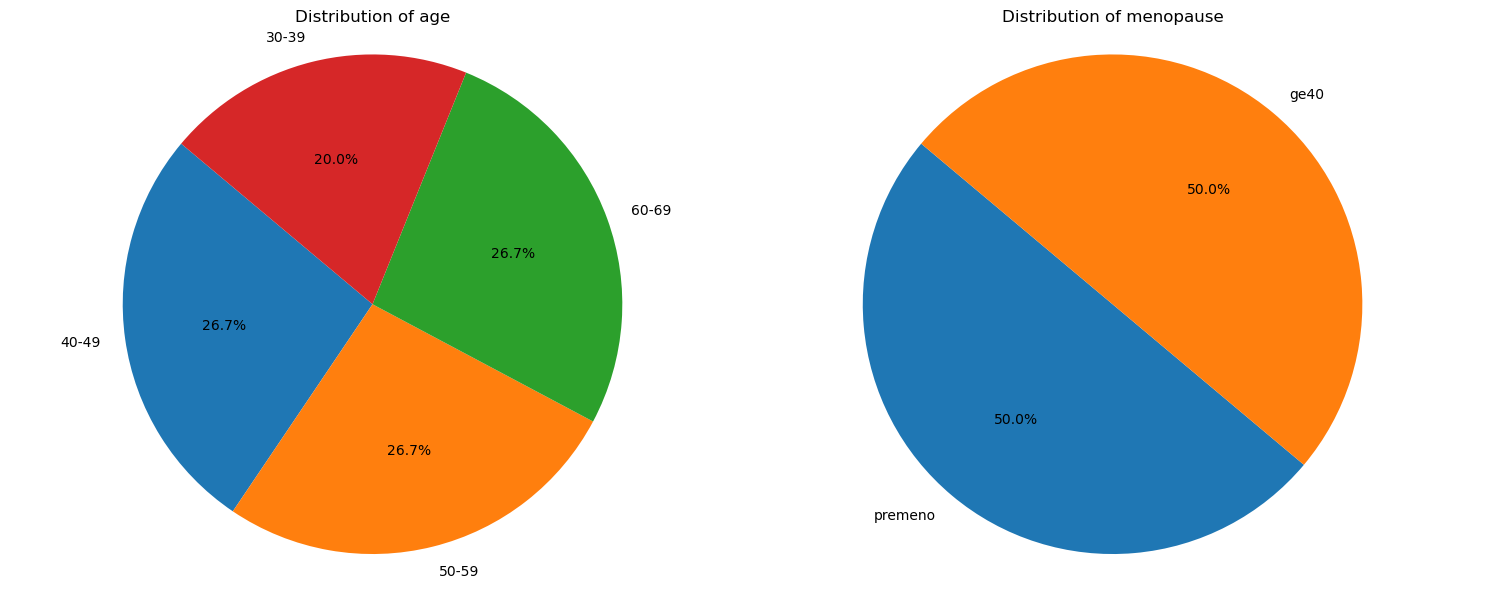

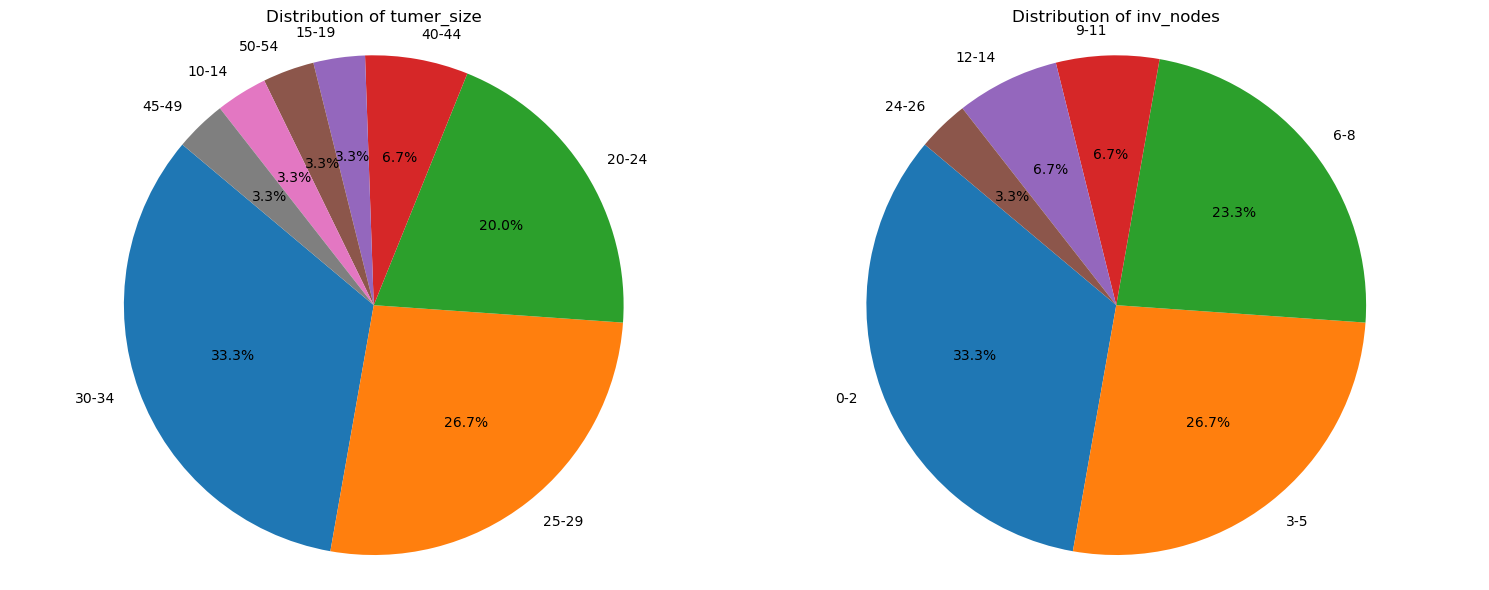

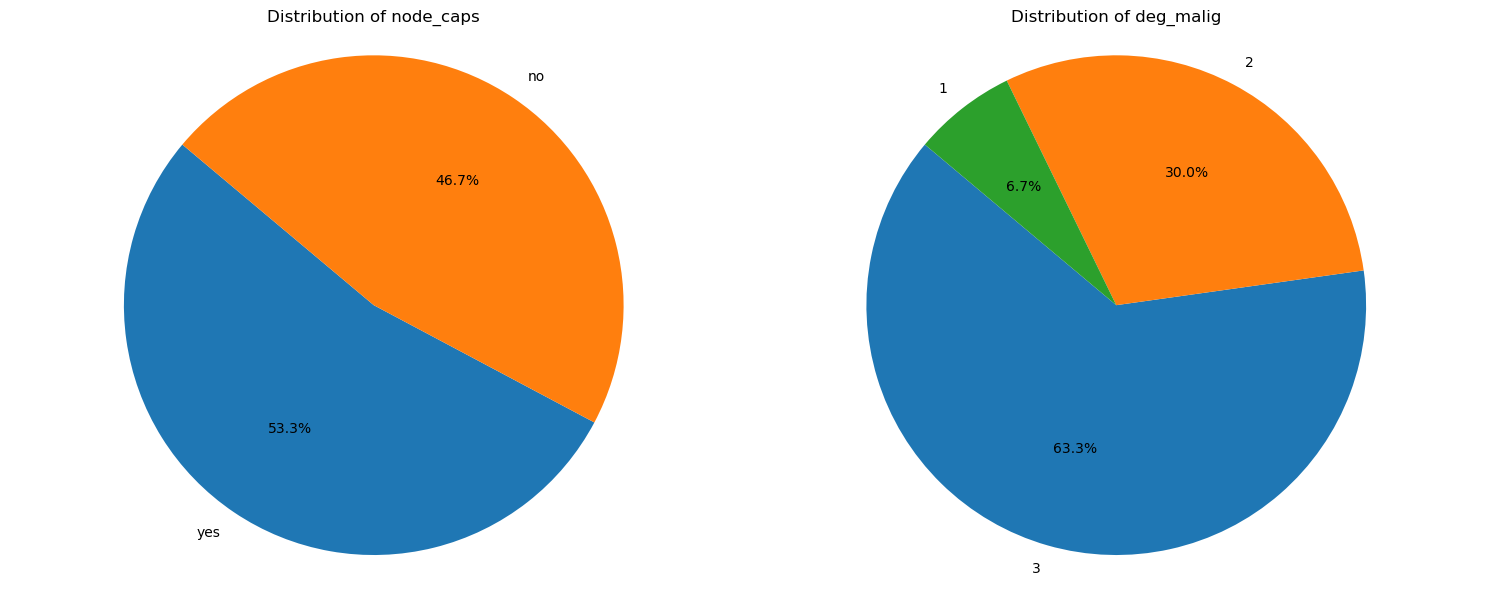

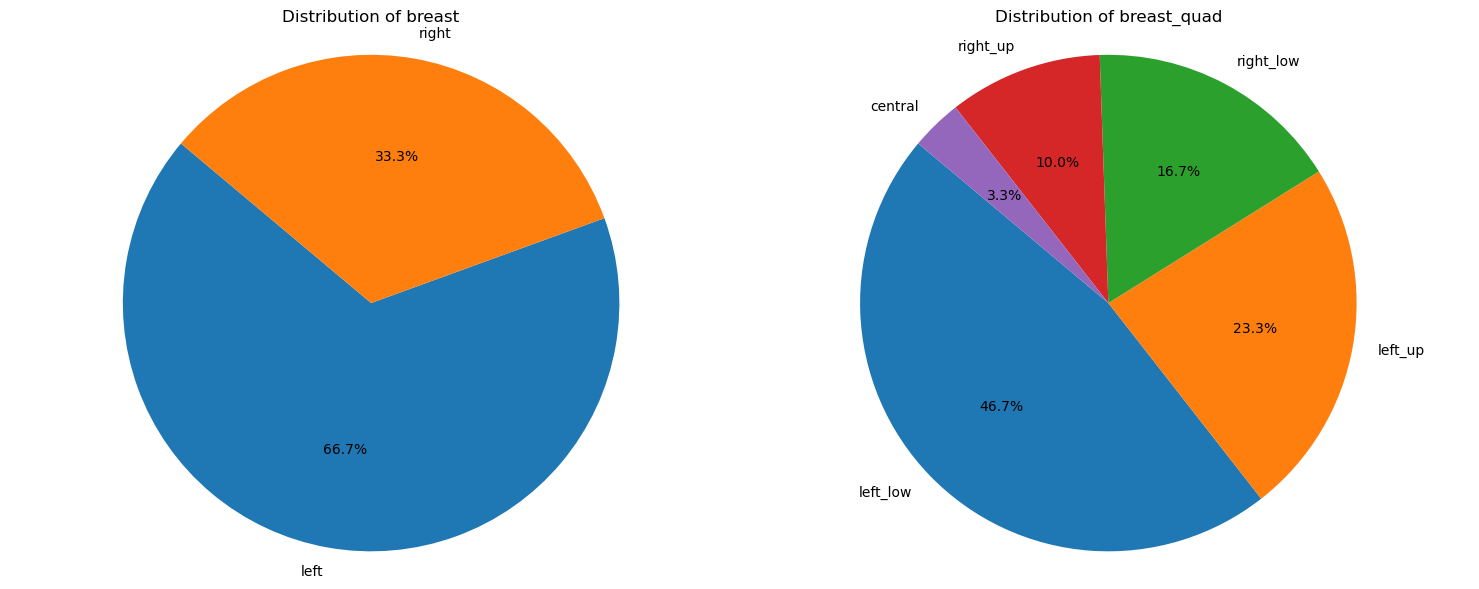

In [13]:
columns = ['age', 'menopause', 'tumer_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad']

column_groups = [columns[i:i+2] for i in range(0, len(columns), 2)]

for group in column_groups:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    for i, col in enumerate(group):
        ax = axes[i]
        value_counts = filtered_df4[col].value_counts()
        labels = value_counts.index
        sizes = value_counts.values
        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        ax.axis('equal')
        ax.set_title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()

## 7) Create Models

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [15]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [16]:
df["target"].value_counts()

0    196
1     81
Name: target, dtype: int64

##### Encoded

* Recurrence-events : 1
* No-reccurence-event : 0

In [17]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Trees
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Support Vector Machines (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)

Decision Tree Accuracy: 0.75
Random Forest Accuracy: 0.8571428571428571
SVM Accuracy: 0.8035714285714286
KNN Accuracy: 0.7857142857142857
Logistic Regression Accuracy: 0.6964285714285714


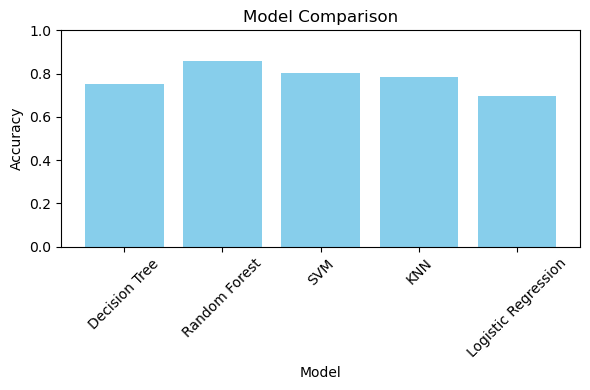

In [19]:
models = [
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("SVM", SVC(random_state=42)),
    ("KNN", KNeighborsClassifier()),
    ("Logistic Regression", LogisticRegression(random_state=42))
]

results = []
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))

results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])

plt.figure(figsize=(6, 4))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

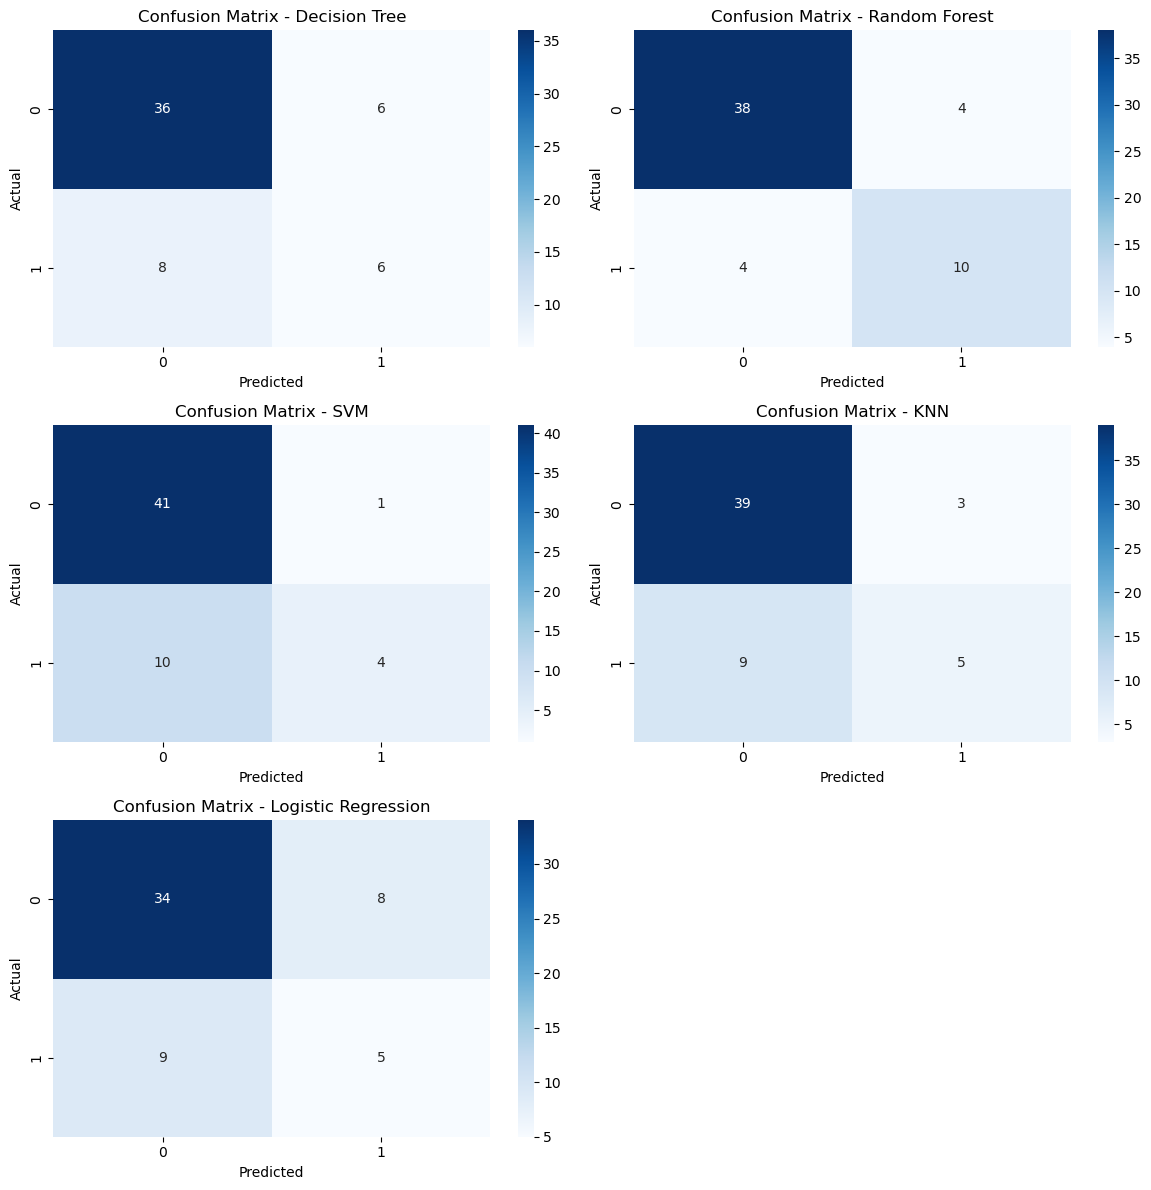

In [20]:
from sklearn.metrics import confusion_matrix

num_models = len(models)
num_columns = 2
num_rows = (num_models + 1) // num_columns  
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(12, 4 * num_rows))

for i, (name, model) in enumerate(models):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    cm = confusion_matrix(y_test, y_pred)
    
    row = i // num_columns
    col = i % num_columns
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[row, col])
    axes[row, col].set_xlabel('Predicted')
    axes[row, col].set_ylabel('Actual')
    axes[row, col].set_title(f'Confusion Matrix - {name}')
    
    plt.subplots_adjust(hspace=0.5)

for i in range(len(models), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


## ROC Curves and AUC Score

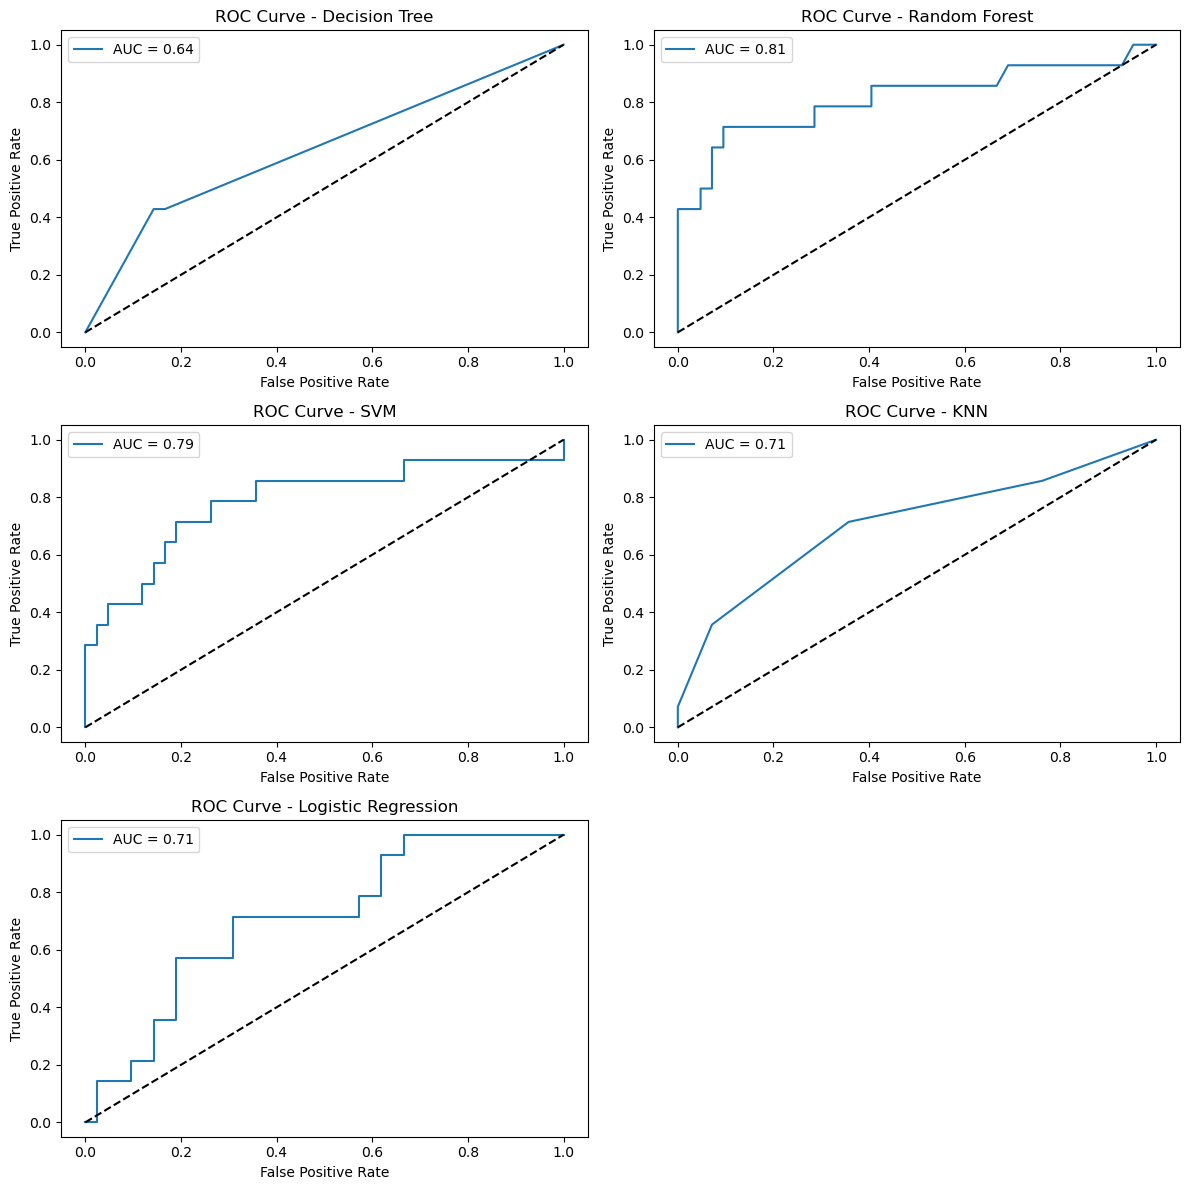

In [21]:
num_models = len(models)
num_columns = 2
num_rows = (num_models + 1) // num_columns

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(12, 4 * num_rows))

for i, (name, model) in enumerate(models):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_prob = model.decision_function(X_test_scaled)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    
    row = i // num_columns
    col = i % num_columns
    axes[row, col].plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    axes[row, col].plot([0, 1], [0, 1], 'k--')
    axes[row, col].set_xlabel('False Positive Rate')
    axes[row, col].set_ylabel('True Positive Rate')
    axes[row, col].set_title(f'ROC Curve - {name}')
    axes[row, col].legend()
    
    plt.subplots_adjust(hspace=0.5)

for i in range(len(models), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

#### Categorization of ROC curves

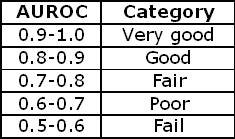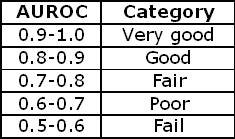

In [22]:
#rf_model = RandomForestClassifier(random_state=42)
#rf_model.fit(X_train_scaled, y_train)
#rf_pred = rf_model.predict(X_test_scaled)
#rf_accuracy = accuracy_score(y_test, rf_pred)

### Save model

In [23]:
import pickle

with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)


#### Load Model

In [24]:
#with open('random_forest_model.pkl', 'rb') as model_file:
#    loaded_model = pickle.load(model_file)


#predictions = loaded_model.predict(X_test_scaled)
